In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np
import random
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import seaborn as sns

In [ ]:
sns.set()

In [ ]:
def make_idealized_curve():
  plt.figure(figsize=(6, 3))
  xvals = np.linspace(0, 1, 130)
  validation_error = 0.15 + (1.5 * (xvals-0.6)**2)
  training_error = [math.exp(-(2*x))-.35 for x in xvals]
  plt.plot(xvals, validation_error, label='Validation error', color='red', linewidth=2, zorder=10)
  plt.plot(xvals, training_error, label='Training error', color='blue', linewidth=2, zorder=10)
  plt.xticks([0, .2, .4, .6, .8, 1], [0, 10, 20, 30, 40, 50])
  plt.yticks([], [])
  plt.xlim(0, 1)
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.title('Idealized Error Curve')
  plt.legend(loc='lower left')
  plt.show()
  plt.savefig('Idealized-error-curve')

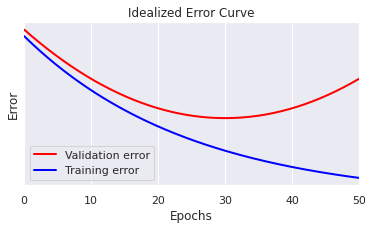

<Figure size 432x288 with 0 Axes>

In [ ]:
make_idealized_curve()

In [ ]:
def get_tempo_data():
  xs = np.linspace(0, 1, 30)
  ys = [.8, .7, .55, .5, .65, .6, .63, .6, .45, .4, .48, .42, .51, 
          .65, .63, .68, .75, .72, .8, .82, .8, .7, .74, .7, .77, .6,
         .5, .45, .42, .4]
  highres_xs = np.linspace(0, 1, 300)
  return (xs, ys, highres_xs)

In [ ]:
def quick_fit_and_predict(fit_degree, X_train, y_train, X_test):
  if fit_degree < 1:
    y_predict = [np.interp(x, X_train, y_train) for x in X_test] 
  else:
    polynomial_features = PolynomialFeatures(degree=fit_degree)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomia_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)
    y_predict = pipeline.predict(X_test[:, np.newaxis])
    return y_predict

In [ ]:
def show_tempo_data():
  plt.figure(figsize=(7, 5))
  (xs, ys, highres_xs) = get_tempo_data()
  plt.scatter(xs, ys, edgecolors='b', facecolors='b', zorder=10, s=50)
  plt.xlim(-0.02, 1.02)
  plt.ylim(0, 1)
  plt.xticks([0, .2, .4, .6, .8, 1], ['9:00am', '10:30am', '12:00am', '1:30pm', '3:00pm', '4:30pm'])
  plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1])
  plt.xlabel('Time')
  plt.ylabel('Tempo')
  plt.show()
  plt.savefig('tempo-data')

In [ ]:
def show_tempo_match(degree):
  (xs, ys, highres_xs) = get_tempo_data()
  y_predict = quick_fit_and_predict(degree, xs, ys, highres_xs)
  plt.scatter(xs, ys, s=50)
  plt.plot(highres_xs, y_predict, color='r', linewidth=2, zorder=10)
  plt.xlim(-0.02, 1.02)
  plt.ylim(0, 1)
  plt.xticks([0, .2, .4, .6, .8, 1], ['9:00am', '10:30am', '12:00am', '1:30pm', '3:00pm', '4:30pm'])
  plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5, 0.75, 1])
  plt.xlabel('Time')
  plt.ylabel('Tempo')
  plt.show()
  


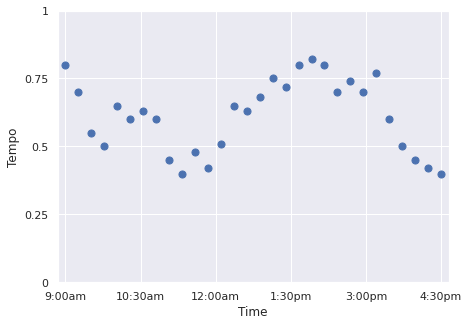

<Figure size 432x288 with 0 Axes>

In [ ]:
show_tempo_data()

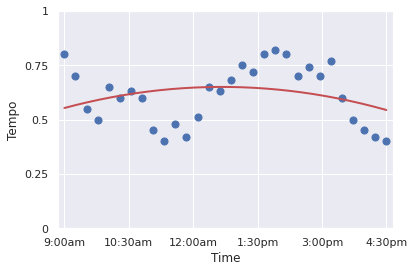

In [ ]:
show_tempo_match(2)

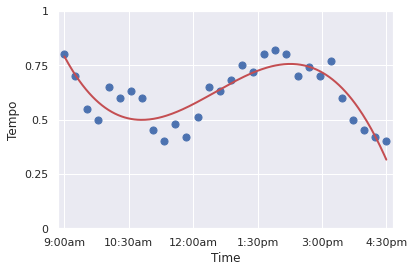

In [ ]:
show_tempo_match(4)

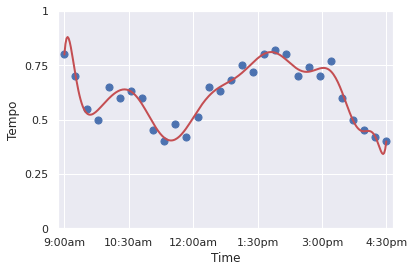

<Figure size 432x288 with 0 Axes>

In [ ]:
show_tempo_match(15)

In [ ]:
def show_L1_L2(values, title):
    L1 = np.sum([abs(v) for v in values])
    L2 = np.sqrt(np.sum([v**2 for v in values]))
    xs = range(3+len(values))
    ys = values + [0, L1, L2]
    red = '#A84949'
    yel = '#B0A14C'
    blu = '#4C72B0'
    clrs = ([blu]*(len(values)+1)) + [yel, red]
    plt.bar(xs, ys, align='center', color=clrs)
    xvals = [' '] * (1+len(values)) + ['L1', 'L2']
    plt.xticks(xs, xvals)
    ysteps = np.linspace(0, max(L1, L2), 5)
    ysteps_labels = ['{:.2f}'.format(y) for y in ysteps]
    plt.yticks(ysteps, ysteps_labels)
    plt.title(title)

In [ ]:
def make_L1_L2_grid():
  plt.figure(figsize=(10,4))
  plt.subplot(1, 2, 1)
  show_L1_L2([.3, .1, .2, .4, .7], 'Values in the range [0,1]')
  plt.subplot(1, 2, 2)
  show_L1_L2([2, 9, 5, 7, 3], 'Values in the range [2,9]')
  plt.tight_layout()
  plt.show()
  plt.savefig('L1-L2-grid')


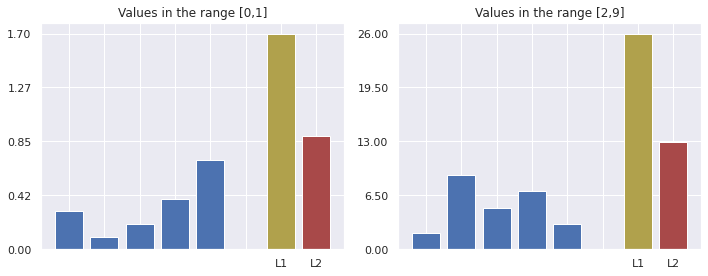

<Figure size 432x288 with 0 Axes>

In [ ]:
make_L1_L2_grid()